In [ ]:
!pip install numpy==1.24.4 --force-reinstall


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/car_damage_dataset.zip -d /content/car_damage_dataset


Archive:  /content/drive/MyDrive/car_damage_dataset.zip
replace /content/car_damage_dataset/car_damage_dataset/img/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install -U pip
!pip install numpy==1.24.4  # Temporary fix for NumPy 2.0 issues
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install git+https://github.com/facebookresearch/detectron2.git


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

Importing detectron2 and coco_instance files


In [ ]:
from detectron2.data.datasets import register_coco_instances
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

In [ ]:
register_coco_instances(
    "car_damage_train", {},
    "/content/car_damage_dataset/car_damage_dataset/train/COCO_train_annos.json",
    "/content/car_damage_dataset/car_damage_dataset/train"
)

register_coco_instances(
    "car_damage_val", {},
    "/content/car_damage_dataset/car_damage_dataset/val/COCO_val_annos.json",
    "/content/car_damage_dataset/car_damage_dataset/val"
)

check one image

[06/15 18:41:20 d2.data.datasets.coco]: Loaded 59 images in COCO format from /content/car_damage_dataset/car_damage_dataset/train/COCO_train_annos.json


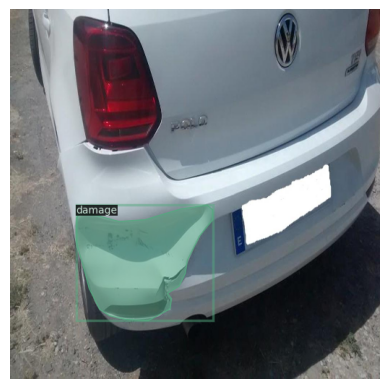

In [ ]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import random
import cv2

dataset_dicts = DatasetCatalog.get("car_damage_train")
metadata = MetadataCatalog.get("car_damage_train")

d = random.choice(dataset_dicts)
img = cv2.imread(d["file_name"])
vis = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
out = vis.draw_dataset_dict(d)
import matplotlib.pyplot as plt
plt.imshow(out.get_image())
plt.axis('off')
plt.show()


**Downloading files and liberaries**

In [ ]:
!mkdir -p configs/COCO-InstanceSegmentation
!wget https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml -O configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml



In [ ]:
# Make the directory structure
!mkdir -p configs/COCO-InstanceSegmentation

# Download the main config
!wget https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml -O configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml

# Download the base config
!wget https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/Base-RCNN-FPN.yaml -O configs/Base-RCNN-FPN.yaml


In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git


In [ ]:
!pip install numpy==1.26.4 --quiet
!pip uninstall -y tensorboard --quiet
!pip install tensorboard==2.18.0 --quiet



**Model Training**

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.DATASETS.TRAIN = ("car_damage_train",)
cfg.DATASETS.TEST = ("car_damage_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.OUTPUT_DIR = "/content/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 3000
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()



[06/15 18:50:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias


[06/15 18:50:35 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/15 18:50:43 d2.utils.events]:  eta: 0:14:33  iter: 19  total_loss: 2.409  loss_cls: 0.9907  loss_box_reg: 0.002779  loss_mask: 0.6919  loss_rpn_cls: 0.679  loss_rpn_loc: 0.01418    time: 0.2958  last_time: 0.2668  data_time: 0.0222  last_data_time: 0.0042   lr: 4.9953e-06  max_mem: 1941M
[06/15 18:50:58 d2.utils.events]:  eta: 0:14:27  iter: 39  total_loss: 1.843  loss_cls: 0.4127  loss_box_reg: 0.01822  loss_mask: 0.6898  loss_rpn_cls: 0.673  loss_rpn_loc: 0.02065    time: 0.2946  last_time: 0.3201  data_time: 0.0075  last_data_time: 0.0050   lr: 9.9902e-06  max_mem: 1941M
[06/15 18:51:05 d2.utils.events]:  eta: 0:14:33  iter: 59  total_loss: 1.564  loss_cls: 0.1644  loss_box_reg: 0.007936  loss_mask: 0.6871  loss_rpn_cls: 0.66  loss_rpn_loc: 0.02216    time: 0.3096  last_time: 0.2964  data_time: 0.0107  last_data_time: 0.0214   lr: 1.4985e-05  max_mem: 1943M
[06/15 18:51:11 d2.utils.events]:  eta: 0:14:33  iter: 79  total_loss: 1.523  loss_cls: 0.1196  loss_box_reg: 0.03375  loss

**Evaluation**

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
# Define evaluator
evaluator = COCOEvaluator("car_damage_val", cfg, False, output_dir=os.path.join(cfg.OUTPUT_DIR, "inference"))

# Build validation data loader
val_loader = build_detection_test_loader(cfg, "car_damage_val")

# Run evaluation on the last trained model
from detectron2.engine import DefaultTrainer

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)

print("Running evaluation...")
inference_results = inference_on_dataset(trainer.model, val_loader, evaluator)
print(inference_results)


WARNING [06/15 19:08:57 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/15 19:08:57 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/car_damage_dataset/car_damage_dataset/val/COCO_val_annos.json
[06/15 19:08:57 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/15 19:08:57 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[06/15 19:08:57 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[06/15 19:08:57 d2.data.common]: Serialized dataset takes 0.01 MiB
[06/15 19:08:59 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride

/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[06/15 19:09:00 d2.engine.hooks]: Loading scheduler from state_dict ...
Running evaluation...
[06/15 19:09:00 d2.evaluation.evaluator]: Start inference on 11 batches
[06/15 19:09:02 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0011 s/iter. Inference: 0.0816 s/iter. Eval: 0.0353 s/iter. Total: 0.1180 s/iter. ETA=0:00:00
[06/15 19:09:02 d2.evaluation.evaluator]: Total inference time: 0:00:00.767344 (0.127891 s / iter per device, on 1 devices)
[06/15 19:09:02 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.081607 s / iter per device, on 1 devices)
[06/15 19:09:02 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/15 19:09:02 d2.evaluation.coco_evaluation]: Saving results to /content/output/inference/coco_instances_results.json
[06/15 19:09:02 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[06/15 19:09:02 d2.ev

**Visualize pridictions**

[06/15 19:09:28 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[06/15 19:09:29 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/car_damage_dataset/car_damage_dataset/val/COCO_val_annos.json


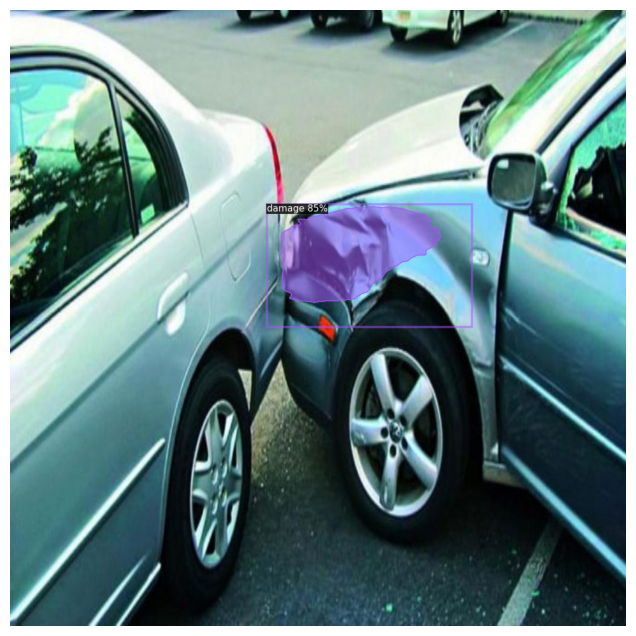

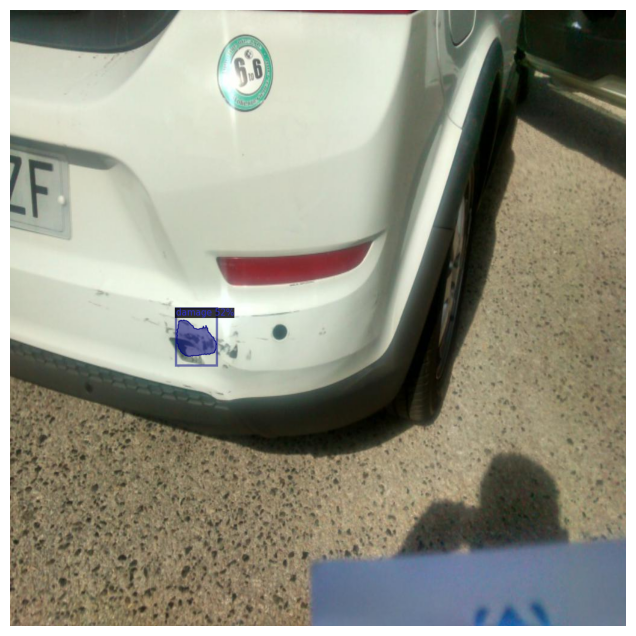

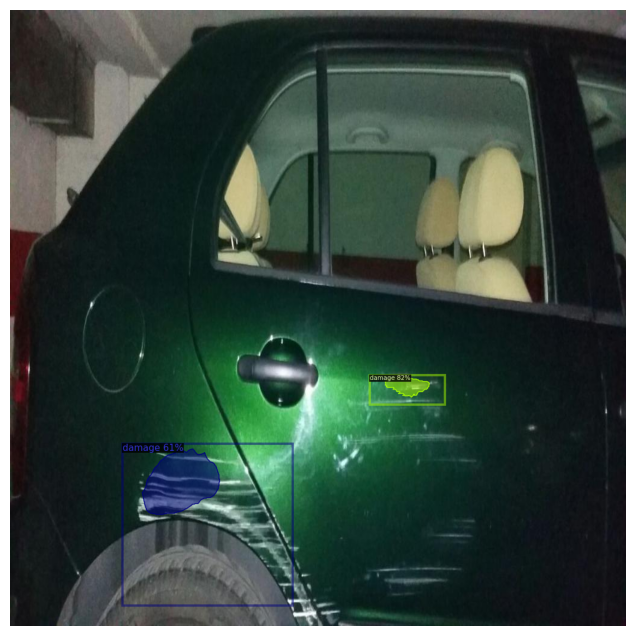

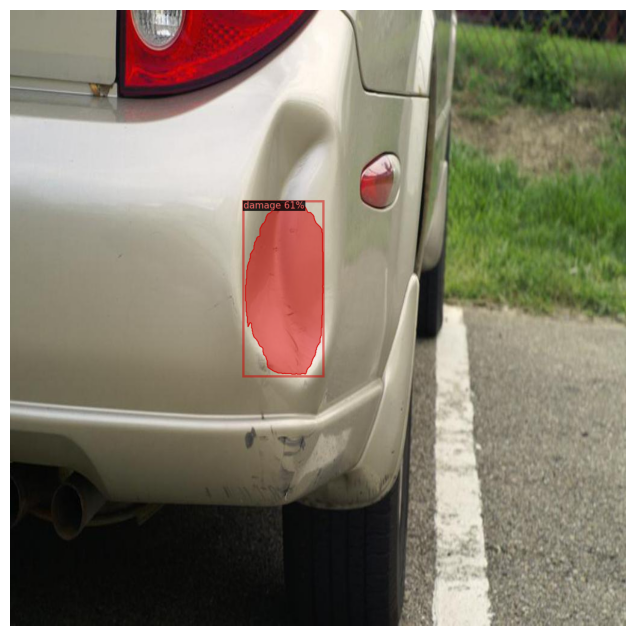

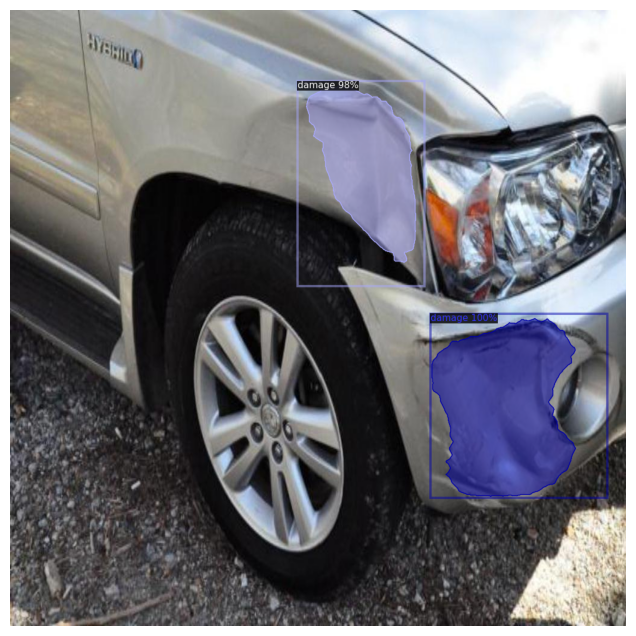

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

# Load config and model weights
cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("car_damage_val", )
predictor = DefaultPredictor(cfg)

# Get metadata and dataset
metadata = MetadataCatalog.get("car_damage_val")
dataset_dicts = DatasetCatalog.get("car_damage_val")

# Create output directory
output_folder = "/content/output/val_predictions"
os.makedirs(output_folder, exist_ok=True)

# === Show 5 random predictions using matplotlib ===
for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)

    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=1.0)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(12, 8))
    plt.imshow(v.get_image())
    plt.axis('off')
    plt.show()

# === Save all predictions to output/val_predictions ===
for idx, d in enumerate(dataset_dicts):
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)

    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=1.0)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    out_img = v.get_image()[:, :, ::-1]
    filename = os.path.join(output_folder, f"image_{idx+1}.jpg")
    cv2.imwrite(filename, out_img)

